Creating plot with dual y-axis (current and derivatives)...
Data loaded successfully. Shape: (900, 3)
Plot saved as: I-Vx-Vn_0x4mVpl_1mVs_MUXon_90MHz0dBm_2509121545_with_derivatives.pdf
Number of x2 values: 6
x2 (V_n) range: -0.490 V to -0.440 V
x1 (V_x) range: -0.700 V to -0.551 V
y (Current) range: 2.370000e-04 A to 9.691400e-02 A


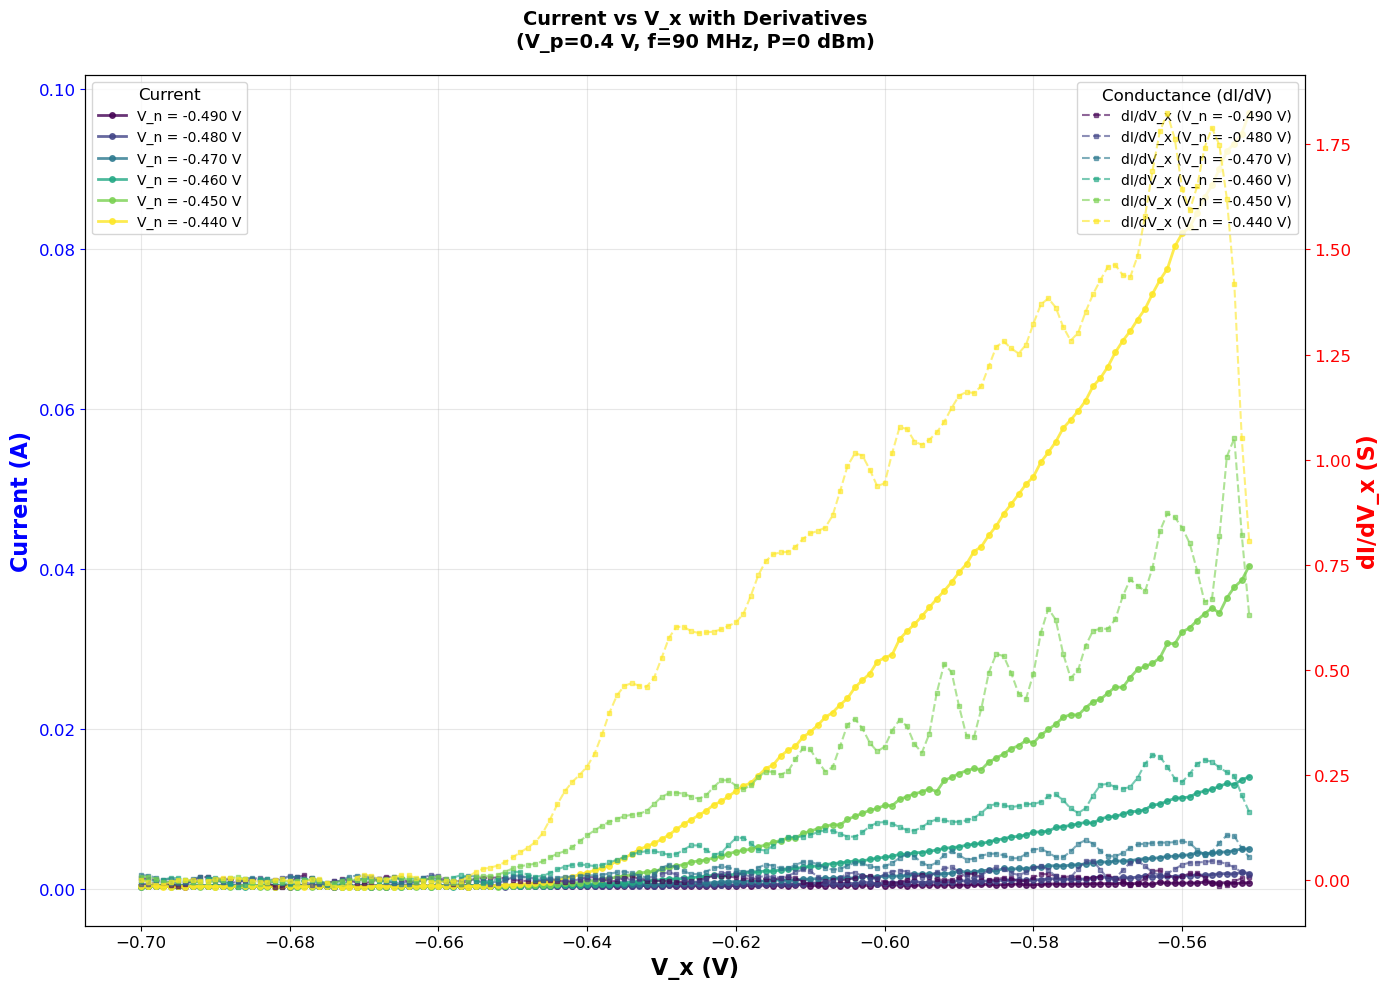


Creating separate subplots...
Separate plots saved as: I-Vx-Vn_0x4mVpl_1mVs_MUXon_90MHz0dBm_2509121545_separate_plots.pdf


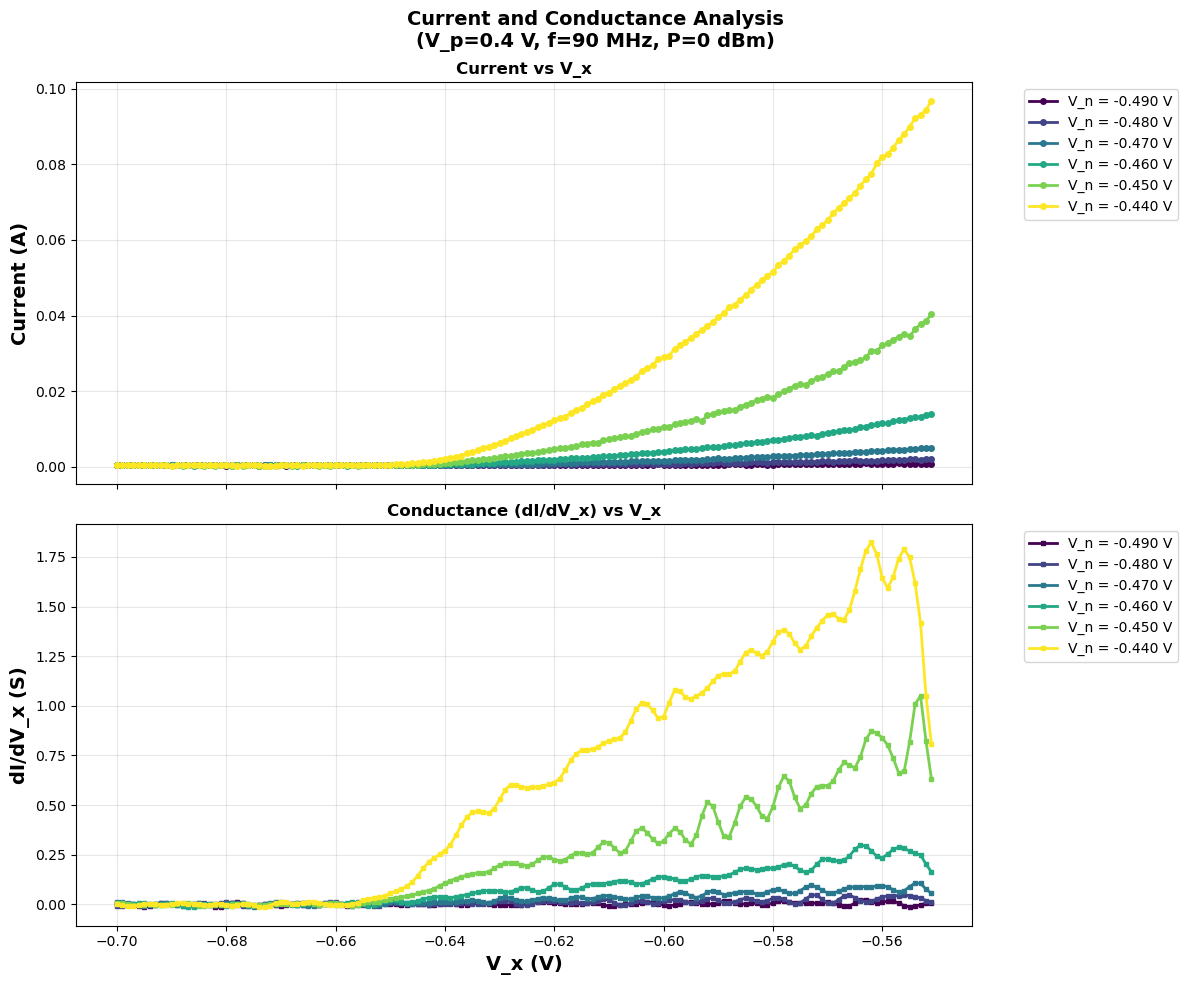


Analyzing conductance peaks...
=== Conductance Peak Analysis ===
V_n = -0.490 V:
  Peak at V_x = -0.6920 V, dI/dV = 7.97e-03 S
  Peak at V_x = -0.6780 V, dI/dV = 1.25e-02 S
  Peak at V_x = -0.6670 V, dI/dV = 8.84e-03 S
  Peak at V_x = -0.6520 V, dI/dV = 7.03e-03 S
  Peak at V_x = -0.6400 V, dI/dV = 7.86e-03 S
  Peak at V_x = -0.6340 V, dI/dV = 8.26e-03 S
  Peak at V_x = -0.6220 V, dI/dV = 1.14e-02 S
  Peak at V_x = -0.6130 V, dI/dV = 8.11e-03 S
  Peak at V_x = -0.6030 V, dI/dV = 1.05e-02 S
  Peak at V_x = -0.5950 V, dI/dV = 1.24e-02 S
  Peak at V_x = -0.5880 V, dI/dV = 1.52e-02 S
  Peak at V_x = -0.5790 V, dI/dV = 1.52e-02 S
  Peak at V_x = -0.5750 V, dI/dV = 9.35e-03 S
  Peak at V_x = -0.5700 V, dI/dV = 1.05e-02 S
  Peak at V_x = -0.5630 V, dI/dV = 2.39e-02 S
  Peak at V_x = -0.5580 V, dI/dV = 1.71e-02 S
V_n = -0.480 V:
  Peak at V_x = -0.6290 V, dI/dV = 1.92e-02 S
  Peak at V_x = -0.6210 V, dI/dV = 1.88e-02 S
  Peak at V_x = -0.6110 V, dI/dV = 2.61e-02 S
  Peak at V_x = -0.6040 V, d

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.ndimage import gaussian_filter1d

def plot_data_with_derivatives(filename='I-Vx-Vn_0x4mVpl_1mVs_MUXon_90MHz0dBm_2509121545.txt', 
                              save_pdf=True, pdf_filename=None, smoothing_sigma=1.0):
    """
    Plot x1 vs y curves for various x2 values along with their derivatives dy/dx1.
    
    Parameters:
    filename (str): Path to the data file
    save_pdf (bool): Whether to save the plot as PDF
    pdf_filename (str): Name of the PDF file (auto-generated if None)
    smoothing_sigma (float): Gaussian smoothing parameter for derivative calculation
    """
    
    # Read the data from file
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"File {filename} not found. Please check the file path.")
        return
    except Exception as e:
        print(f"Error reading file: {e}")
        return
    
    # Extract columns: x2 (V2), x1 (V1), y (Current)
    x2_values = data[:, 0]  # First column (V2/Vn)
    x1_values = data[:, 1]  # Second column (V1/Vx) 
    y_values = data[:, 2]   # Third column (Current/I)
    
    # Group data by x2 values
    data_by_x2 = defaultdict(lambda: {'x1': [], 'y': []})
    
    for x2, x1, y in zip(x2_values, x1_values, y_values):
        data_by_x2[x2]['x1'].append(x1)
        data_by_x2[x2]['y'].append(y)
    
    # Sort x2 keys for consistent plotting
    sorted_x2_keys = sorted(data_by_x2.keys())
    
    # Create the plot with dual y-axes
    fig, ax1 = plt.subplots(figsize=(14, 10))
    ax2 = ax1.twinx()  # Create second y-axis
    
    # Colors for plotting
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_x2_keys)))
    
    # Storage for legend entries
    lines1, labels1 = [], []
    lines2, labels2 = [], []
    
    # Plot each x2 curve and its derivative
    for i, x2 in enumerate(sorted_x2_keys):
        x1_data = np.array(data_by_x2[x2]['x1'])
        y_data = np.array(data_by_x2[x2]['y'])
        
        # Sort by x1 to ensure proper line plotting
        sort_indices = np.argsort(x1_data)
        x1_sorted = x1_data[sort_indices]
        y_sorted = y_data[sort_indices]
        
        # Plot original data on left y-axis
        line1 = ax1.plot(x1_sorted, y_sorted, '-o', 
                        color=colors[i], 
                        label=f'V_n = {x2:.3f} V',
                        linewidth=2, markersize=4, alpha=0.8)
        lines1.extend(line1)
        labels1.append(f'V_n = {x2:.3f} V')
        
        # Calculate derivative dy/dx1
        if len(x1_sorted) > 2:  # Need at least 3 points for meaningful derivative
            # Apply smoothing to reduce noise in derivative
            y_smooth = gaussian_filter1d(y_sorted, sigma=smoothing_sigma)
            
            # Calculate derivative using central differences
            dy_dx1 = np.gradient(y_smooth, x1_sorted)
            
            # Plot derivative on right y-axis
            line2 = ax2.plot(x1_sorted, dy_dx1, '--s', 
                           color=colors[i], 
                           label=f'dI/dV_x (V_n = {x2:.3f} V)',
                           linewidth=1.5, markersize=3, alpha=0.6)
            lines2.extend(line2)
            labels2.append(f'dI/dV_x (V_n = {x2:.3f} V)')
    
    # Format primary y-axis (left) - original data
    ax1.set_xlabel('V_x (V)', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Current (A)', fontsize=16, fontweight='bold', color='blue')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='y', colors='blue')
    ax1.grid(True, alpha=0.3)
    
    # Format secondary y-axis (right) - derivatives
    ax2.set_ylabel('dI/dV_x (S)', fontsize=16, fontweight='bold', color='red')
    ax2.tick_params(axis='y', colors='red', labelsize=12)
    
    # Add title
    plt.title('Current vs V_x with Derivatives\n(V_p=0.4 V, f=90 MHz, P=0 dBm)', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Create combined legend
    # Combine both sets of lines and labels
    all_lines = lines1 + lines2
    all_labels = labels1 + labels2
    
    # Create legend with two columns to separate original data from derivatives
    legend1 = ax1.legend(lines1, labels1, loc='upper left', 
                        title='Current', title_fontsize=12, fontsize=10)
    legend2 = ax1.legend(lines2, labels2, loc='upper right', 
                        title='Conductance (dI/dV)', title_fontsize=12, fontsize=10)
    ax1.add_artist(legend1)  # Add back the first legend
    
    # Adjust layout
    plt.tight_layout()
    
    # Save as PDF if requested
    if save_pdf:
        if pdf_filename is None:
            base_name = filename.replace('.txt', '').replace('.dat', '')
            pdf_filename = f"{base_name}_with_derivatives.pdf"
        
        plt.savefig(pdf_filename, format='pdf', dpi=300, bbox_inches='tight')
        print(f"Plot saved as: {pdf_filename}")
    
    # Show statistics
    print(f"Number of x2 values: {len(sorted_x2_keys)}")
    print(f"x2 (V_n) range: {min(sorted_x2_keys):.3f} V to {max(sorted_x2_keys):.3f} V")
    print(f"x1 (V_x) range: {min(x1_values):.3f} V to {max(x1_values):.3f} V")
    print(f"y (Current) range: {min(y_values):.6e} A to {max(y_values):.6e} A")
    
    plt.show()
    
    return data_by_x2

def plot_separate_derivatives(filename='I-Vx-Vn_0x4mVpl_1mVs_MUXon_90MHz0dBm_2509121545.txt', 
                             save_pdf=True, smoothing_sigma=1.0):
    """
    Create separate subplots for original data and derivatives for clearer visualization.
    """
    
    # Read and process data (same as above)
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data")
        return
    
    x2_values = data[:, 0]
    x1_values = data[:, 1] 
    y_values = data[:, 2]
    
    data_by_x2 = defaultdict(lambda: {'x1': [], 'y': []})
    for x2, x1, y in zip(x2_values, x1_values, y_values):
        data_by_x2[x2]['x1'].append(x1)
        data_by_x2[x2]['y'].append(y)
    
    sorted_x2_keys = sorted(data_by_x2.keys())
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_x2_keys)))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
    for i, x2 in enumerate(sorted_x2_keys):
        x1_data = np.array(data_by_x2[x2]['x1'])
        y_data = np.array(data_by_x2[x2]['y'])
        
        sort_indices = np.argsort(x1_data)
        x1_sorted = x1_data[sort_indices]
        y_sorted = y_data[sort_indices]
        
        # Plot original data
        ax1.plot(x1_sorted, y_sorted, '-o', 
                color=colors[i], 
                label=f'V_n = {x2:.3f} V',
                linewidth=2, markersize=4)
        
        # Calculate and plot derivative
        if len(x1_sorted) > 2:
            y_smooth = gaussian_filter1d(y_sorted, sigma=smoothing_sigma)
            dy_dx1 = np.gradient(y_smooth, x1_sorted)
            
            ax2.plot(x1_sorted, dy_dx1, '-s', 
                    color=colors[i], 
                    label=f'V_n = {x2:.3f} V',
                    linewidth=2, markersize=3)
    
    # Format subplots
    ax1.set_ylabel('Current (A)', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.set_title('Current vs V_x', fontsize=12, fontweight='bold')
    
    ax2.set_xlabel('V_x (V)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('dI/dV_x (S)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.set_title('Conductance (dI/dV_x) vs V_x', fontsize=12, fontweight='bold')
    
    plt.suptitle('Current and Conductance Analysis\n(V_p=0.4 V, f=90 MHz, P=0 dBm)', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_separate_plots.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=300, bbox_inches='tight')
        print(f"Separate plots saved as: {pdf_filename}")
    
    plt.show()

def analyze_conductance_peaks(filename='I-Vx-Vn_0x4mVpl_1mVs_MUXon_90MHz0dBm_2509121545.txt', 
                             smoothing_sigma=1.0):
    """
    Analyze and identify peaks in the conductance (dI/dV) data.
    """
    
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for peak analysis")
        return
    
    from scipy.signal import find_peaks
    
    x2_values = data[:, 0]
    x1_values = data[:, 1] 
    y_values = data[:, 2]
    
    data_by_x2 = defaultdict(lambda: {'x1': [], 'y': []})
    for x2, x1, y in zip(x2_values, x1_values, y_values):
        data_by_x2[x2]['x1'].append(x1)
        data_by_x2[x2]['y'].append(y)
    
    print("=== Conductance Peak Analysis ===")
    
    for x2 in sorted(data_by_x2.keys()):
        x1_data = np.array(data_by_x2[x2]['x1'])
        y_data = np.array(data_by_x2[x2]['y'])
        
        sort_indices = np.argsort(x1_data)
        x1_sorted = x1_data[sort_indices]
        y_sorted = y_data[sort_indices]
        
        if len(x1_sorted) > 5:
            y_smooth = gaussian_filter1d(y_sorted, sigma=smoothing_sigma)
            dy_dx1 = np.gradient(y_smooth, x1_sorted)
            
            # Find peaks in conductance
            peaks, properties = find_peaks(dy_dx1, height=np.std(dy_dx1))
            
            if len(peaks) > 0:
                print(f"V_n = {x2:.3f} V:")
                for peak_idx in peaks:
                    peak_voltage = x1_sorted[peak_idx]
                    peak_conductance = dy_dx1[peak_idx]
                    print(f"  Peak at V_x = {peak_voltage:.4f} V, dI/dV = {peak_conductance:.2e} S")

if __name__ == "__main__":
    # Main plotting with derivatives on dual y-axis
    print("Creating plot with dual y-axis (current and derivatives)...")
    data_dict = plot_data_with_derivatives(save_pdf=True, smoothing_sigma=1.5)
    
    # Alternative: separate subplots
    print("\nCreating separate subplots...")
    plot_separate_derivatives(save_pdf=True, smoothing_sigma=1.5)
    
    # Peak analysis
    print("\nAnalyzing conductance peaks...")
    analyze_conductance_peaks(smoothing_sigma=1.5)
    
    print("\nPlotting complete! PDF files have been saved.")